In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2323,ham,Sorry dude. Dont know how i forgot. Even after...,NaN,NaN,NaN
5430,ham,If you can make it any time tonight or wheneve...,NaN,NaN,NaN
4055,ham,"Ha ha nan yalrigu heltini..Iyo kothi chikku, u...",NaN,NaN,NaN
3774,ham,Hi! You just spoke to MANEESHA V. We'd like to...,NaN,NaN,NaN
5154,ham,"Like &lt;#&gt; , same question",NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
#1.data cleaning
#2.EDA
#3.Text preprocessing
#4. model building
#5. Evaluation
#6.improvement
#7.Website
#8.Deploy

## 1.Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
# drop last 3 columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [9]:
df.sample(5)

,v1,v2
155,ham,Aaooooright are you at work?
2826,ham,"Oh right, ok. I'll make sure that i do loads o..."
628,spam,New TEXTBUDDY Chat 2 horny guys in ur area 4 j...
2358,ham,I'll talk to the others and probably just come...
2280,ham,R Ì_ comin back for dinner?


In [10]:
#renaming columns
df.rename(columns={'v1':'target', 'v2': 'text'}, inplace=True)

In [11]:
df.sample(5)

,target,text
170,ham,"Sir, I need AXIS BANK account no and bank addr..."
4219,ham,U free on sat rite? U wan 2 watch infernal aff...
4448,spam,Urgent UR awarded a complimentary trip to Euro...
4258,ham,Sad story of a Man - Last week was my b'day. M...
4705,ham,Wow so healthy. Old airport rd lor. Cant thk o...


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [13]:
df['target']= encoder.fit_transform(df['target'])

In [14]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
#check missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [16]:
#check duplicate vlaues
df.duplicated().sum()

403

In [17]:
#remove duplicated values
df = df.drop_duplicates(keep='first')

In [18]:
df.duplicated().sum()

0

In [19]:
df.shape

(5169, 2)

## 2.EDA

In [20]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

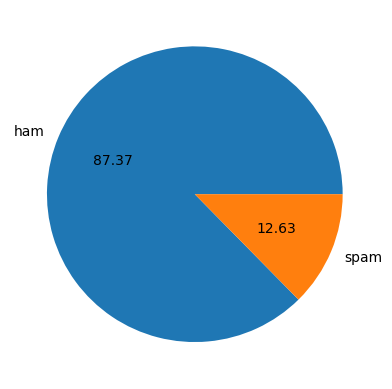

In [22]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels = ['ham', 'spam'], autopct= "%0.2f")
plt.show()

In [22]:
#data is impalanced

In [23]:
import nltk

In [24]:
!pip install nltk

In [25]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\susha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
df['num_characters']=df['text'].apply(len)

In [27]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [28]:
#num of words
df['num_of_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [29]:
df.head()

,target,text,num_characters,num_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [30]:
df['num_of_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [31]:
df.head()

,target,text,num_characters,num_of_words,num_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [32]:
df[['num_characters','num_of_words', 'num_of_sentences']].describe()

,num_characters,num_of_words,num_of_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
df.head()

,target,text,num_characters,num_of_words,num_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [34]:
#ham
df[df['target']==0][['num_characters','num_of_words', 'num_of_sentences']].describe()

,num_characters,num_of_words,num_of_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [35]:
#spam
df[df['target']==1][['num_characters','num_of_words', 'num_of_sentences']].describe()

,num_characters,num_of_words,num_of_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='num_characters', ylabel='Count'>

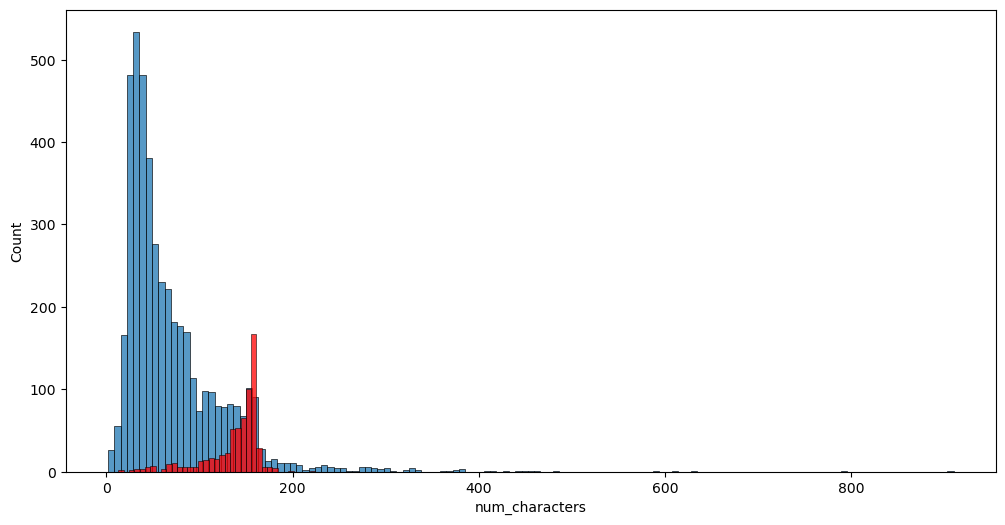

In [37]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'], color='red')

<Axes: xlabel='num_of_words', ylabel='Count'>

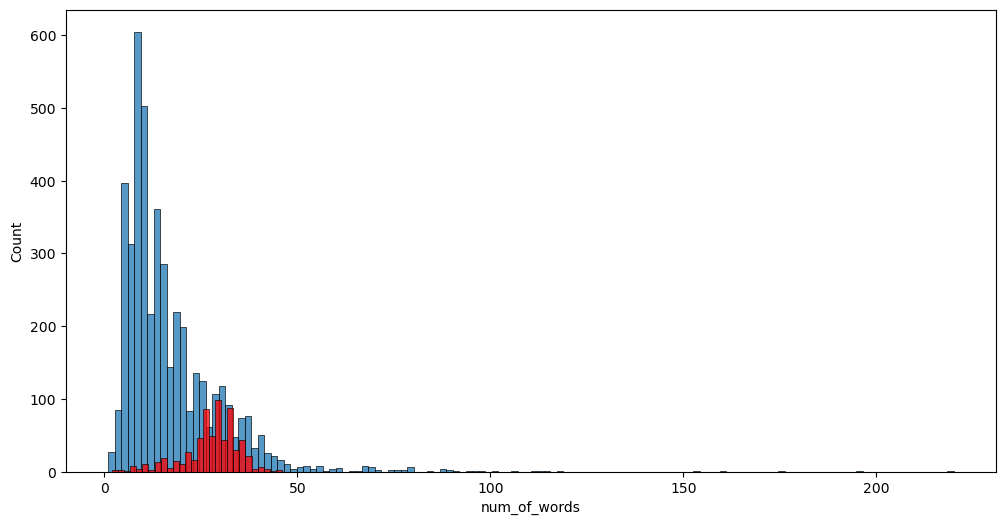

In [38]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['target']==0]['num_of_words'])
sns.histplot(df[df['target']==1]['num_of_words'], color='red')

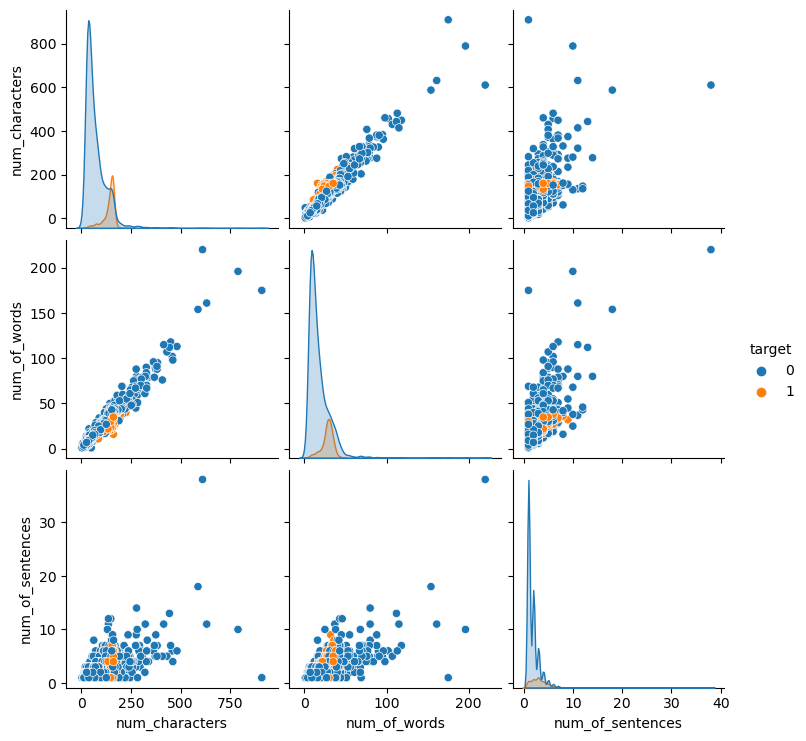

In [39]:
 sns.pairplot(df, hue='target')

In [40]:
df.corr()

C:\Users\susha\AppData\Local\Temp\ipykernel_19824\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,target,num_characters,num_of_words,num_of_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_of_words,0.262912,0.965760,1.000000,0.679971
num_of_sentences,0.263939,0.624139,0.679971,1.000000


C:\Users\susha\AppData\Local\Temp\ipykernel_31760\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

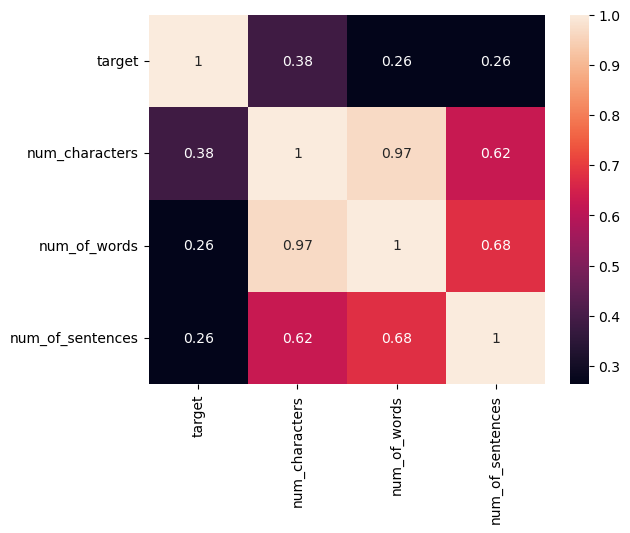

In [41]:
sns.heatmap(df.corr(),annot=True)

## 3. Data Preprocessing
- lowecase
- Tokenziation
- Removing special charcter
- Removing stop words and punctuation
- stemming 

In [38]:
from nltk.corpus import stopwords
import string
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\susha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [39]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [40]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
            
            
    return " ".join(y)


In [45]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [46]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [41]:
df['transformed_text'] = df['text'].apply(transform_text)

In [48]:
df.head()

,target,text,num_characters,num_of_words,num_of_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## Importing word cloud

In [44]:
!pip install wordcloud

In [50]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [51]:
spam_wc = wc.generate(df[df['target']== 1]['transformed_text'].str.cat(sep=" "))

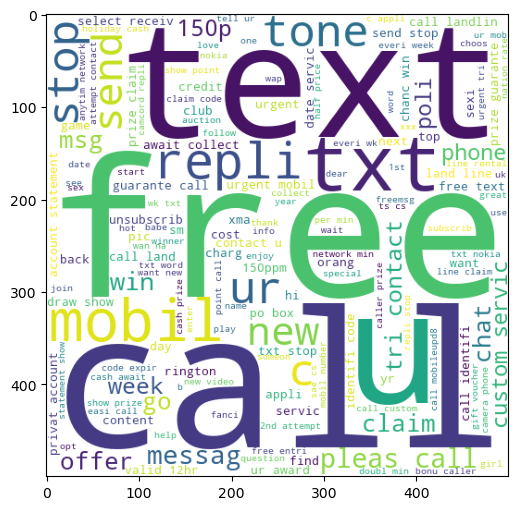

In [52]:
plt.figure(figsize=(15, 6))
plt.imshow(spam_wc)

In [53]:
ham_wc = wc.generate(df[df['target']== 0]['transformed_text'].str.cat(sep=" "))

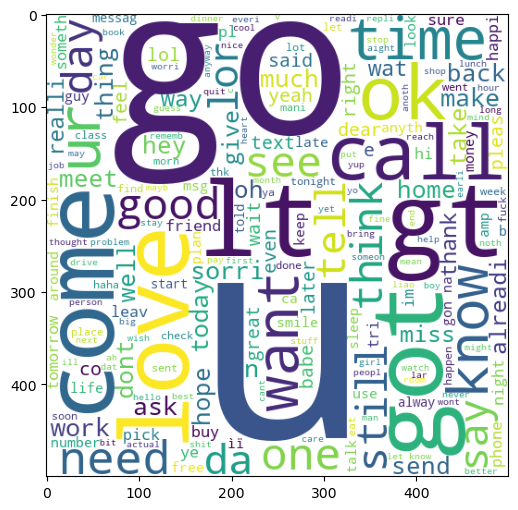

In [54]:
plt.figure(figsize=(15, 6))
plt.imshow(ham_wc)

In [55]:
spam_corpus =[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [56]:
len(spam_corpus)

9939

In [57]:
from collections import Counter
top_words = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])


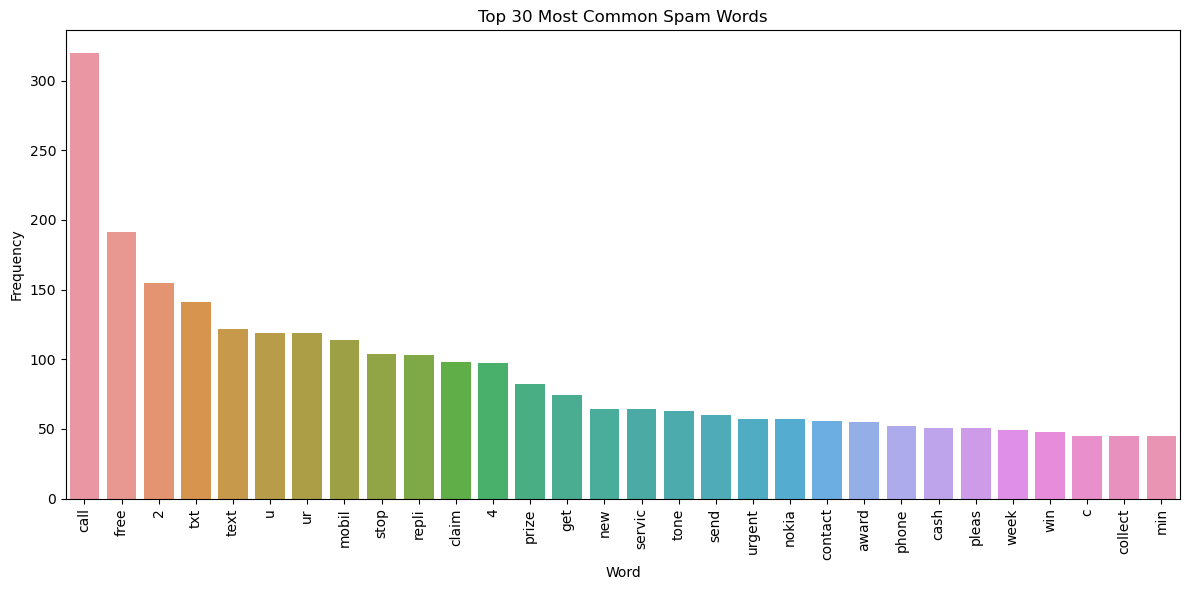

In [58]:
plt.figure(figsize=(12, 6))
sns.barplot(x='word', y='count', data=top_words)
plt.xticks(rotation='vertical')
plt.title("Top 30 Most Common Spam Words")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [59]:
ham_corpus =[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [60]:
len(ham_corpus)

35404

In [61]:
top_words = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])

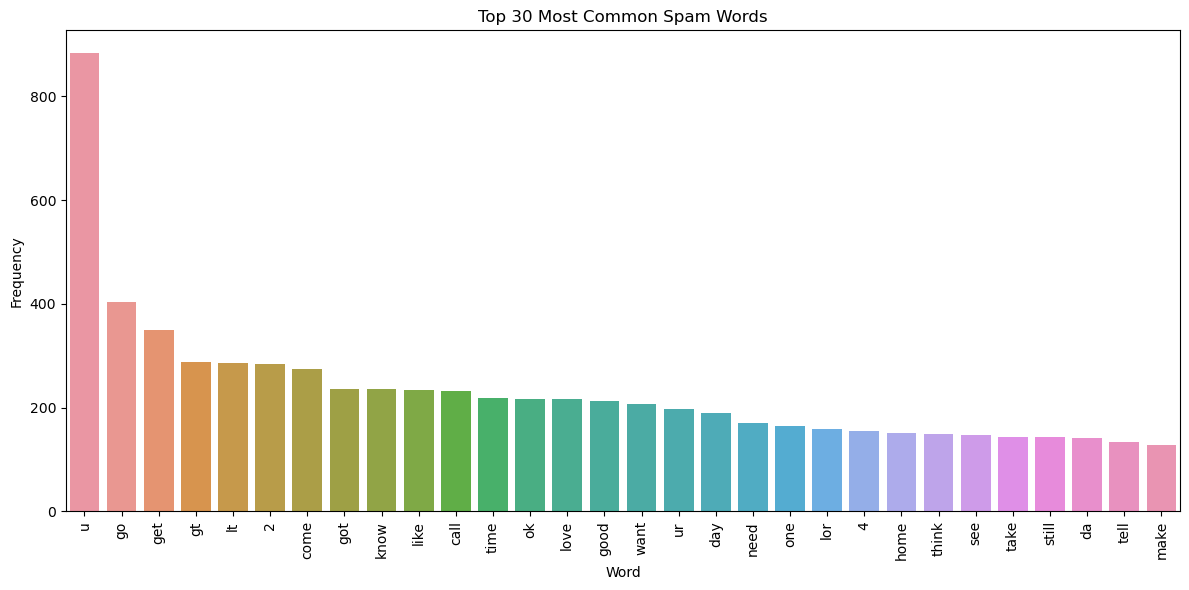

In [62]:
plt.figure(figsize=(12, 6))
sns.barplot(x='word', y='count', data=top_words)
plt.xticks(rotation='vertical')
plt.title("Top 30 Most Common Spam Words")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


## 4. Model Building

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=3000)

In [76]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [77]:
X.shape

(5169, 3000)

In [78]:
y = df['target'].values


In [79]:
y.shape

(5169,)

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [80]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [81]:
gnb = GaussianNB()
mnb= MultinomialNB()
bnb = BernoulliNB()

In [51]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1 ))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [82]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))


0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [53]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


## testing with other several classification model

In [54]:
!pip install xgboost

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [56]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [57]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [58]:
def classifier(clf, X_train, y_train, x_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy, precision


In [63]:
classifier(svc, X_train, y_train, X_test, y_test)

(0.9758220502901354, 0.9747899159663865)

In [59]:
accuracy_scores = []
precision_scores = []


for name, clf in clfs.items():
    current_accuracy, current_precision = classifier(clf, X_train, y_train, X_test, y_test)
    
    print("for", name)
    print("Accuracy =", current_accuracy)
    print("precision =", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

for SVC
Accuracy = 0.9758220502901354
precision = 0.9747899159663865
for KN
Accuracy = 0.9052224371373307
precision = 1.0
for NB
Accuracy = 0.9709864603481625
precision = 1.0
for DT
Accuracy = 0.9274661508704062
precision = 0.8118811881188119
for LR
Accuracy = 0.9584139264990329
precision = 0.9702970297029703
for RF
Accuracy = 0.9758220502901354
precision = 0.9829059829059829
for AdaBoost
Accuracy = 0.960348162475822
precision = 0.9292035398230089
for BgC
Accuracy = 0.9584139264990329
precision = 0.8682170542635659
for ETC
Accuracy = 0.9748549323017408
precision = 0.9745762711864406
for GBDT
Accuracy = 0.9468085106382979
precision = 0.9191919191919192
for xgb
Accuracy = 0.9671179883945842
precision = 0.9482758620689655


In [60]:
data_performance = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores, 'Precision':precision_scores}).sort_values('Precision', ascending=False)

In [61]:
data_performance

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.967118,0.948276
6,AdaBoost,0.960348,0.929204
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [62]:
data_performance_df = pd.melt(data_performance, id_vars = "Algorithm")

In [63]:
data_performance_df 

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,xgb,Accuracy,0.967118
7,AdaBoost,Accuracy,0.960348
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.958414


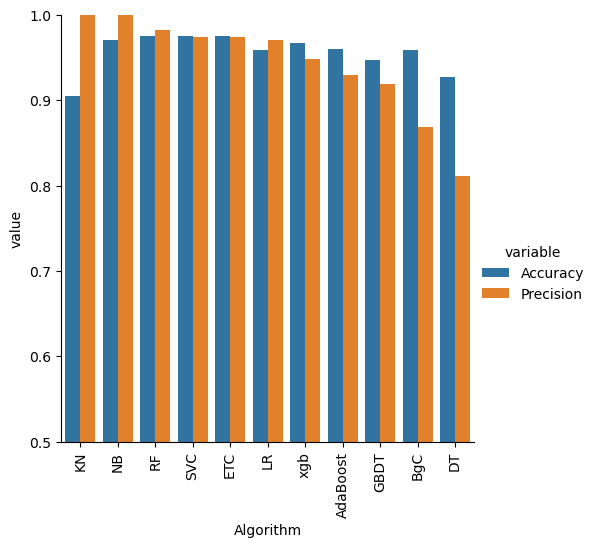

In [64]:
sns.catplot(x= 'Algorithm', y = 'value', hue= 'variable', data=data_performance_df, kind = 'bar', height = 5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()

## voting classifier

- it aggregates prediction from different classifier and makes a final decision based on voting

In [65]:
# we will be using these best model(based on the high presicion value) for voting classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)


In [66]:
from sklearn.ensemble import VotingClassifier

In [67]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)], voting ='soft')

In [68]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [69]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [70]:
base_model = [('svm', svc), ('nb', mnb), ('et', etc)]
meta_model = RandomForestClassifier()

In [71]:
from sklearn.ensemble import StackingClassifier

In [72]:
stk_clf= StackingClassifier(estimators = base_model, final_estimator=meta_model)

In [73]:
stk_clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9671179883945842
Precision 0.9482758620689655


In [83]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

